In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1909 = df[df['기준년월'] == 201909]

In [6]:
df_1909.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
66588,201909,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,강동구,길동,401631,9
66590,201909,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,광진구,능동,1688549,17
66591,201909,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,광진구,능동,2128596,19
66592,201909,16,식품,1612,음료,여성,30대,1인가구,서울특별시,광진구,능동,95919,5
66598,201909,11,패션잡화,1112,가방,여성,40대,신혼영유아가구,서울특별시,양천구,목동,2621338,12
66599,201909,15,전자,1510,가전,여성,40대,신혼영유아가구,서울특별시,양천구,목동,955559,14
66600,201909,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,양천구,목동,234707,7
66604,201909,20,여가/스포츠,2011,레저,남성,30대,신혼영유아가구,서울특별시,중랑구,묵동,699976,9
66605,201909,20,여가/스포츠,2012,문화,여성,20대,1인가구,서울특별시,중랑구,묵동,6620798,53
66606,201909,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,중랑구,묵동,772965,17


In [7]:
sigoongu = list(set(df_1909['고객소재지_시군구']))
print(len(sigoongu))

25


In [8]:
big_category = list(set(df_1909['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1909['품목중분류명']))
print(len(middle_category))

13
49


In [9]:
lifestyle = list(set(df_1909['가구생애주기']))
print(len(lifestyle))
lifestyle

5


['신혼영유아가구', '노인가구', '1인가구', '초중고자녀가구', '성인자녀가구']

지역별 매출
송파구     4517
강남구     4389
마포구     4023
영등포구    3714
성북구     3288
은평구     3252
강서구     3087
강동구     3047
성동구     2836
구로구     2695
서대문구    2670
서초구     2658
용산구     2584
동작구     2526
동대문구    2525
광진구     2294
노원구     2233
중랑구     2132
양천구     1689
관악구     1581
종로구     1549
도봉구     1508
강북구     1371
금천구     1191
중구      1172
Name: 고객소재지_시군구, dtype: int64


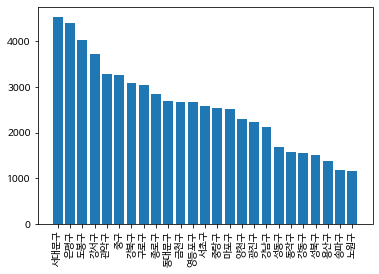

In [10]:
print('지역별 매출')
print(df_1909['고객소재지_시군구'].value_counts())
df_1909_total = df_1909['고객소재지_시군구'].value_counts().tolist()

plt.bar(sigoongu, df_1909_total)
plt.xticks(rotation = 90)
plt.show()

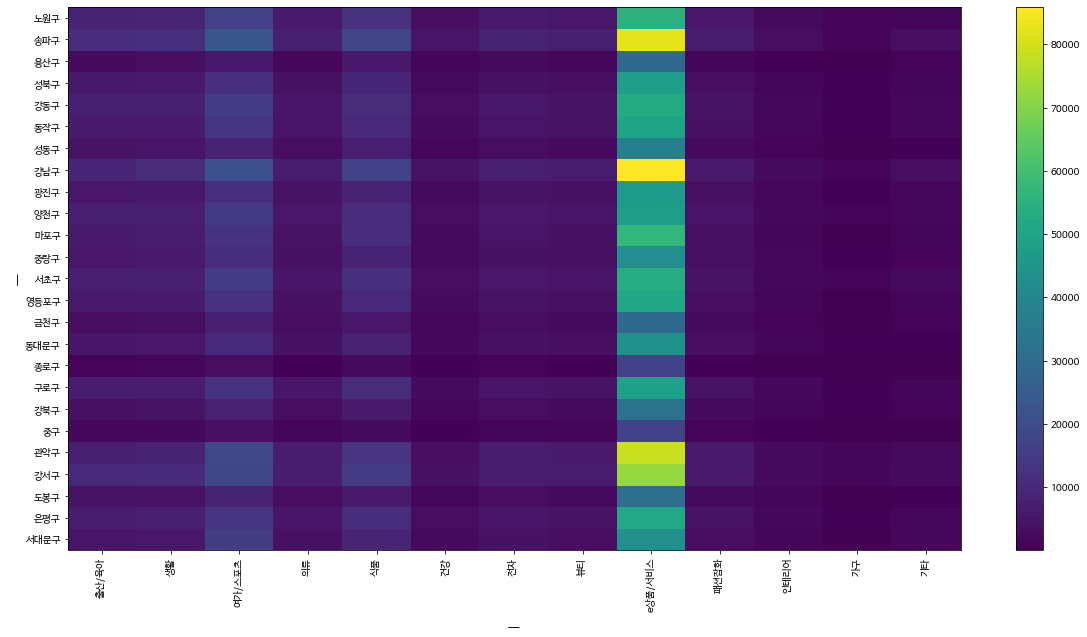

In [11]:
# 시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [12]:
#  시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,출산/육아,생활,여가/스포츠,의류,식품,건강,전자,뷰티,e상품/서비스,패션잡화,인테리어,가구,기타
서대문구,18.0,17.0,6.0,18.0,15.0,17.0,18.0,18.0,17.0,16.0,16.0,21.0,10.0
은평구,10.0,8.0,10.0,7.0,7.0,8.0,9.0,8.0,9.0,10.0,9.0,9.0,9.0
도봉구,20.0,20.0,19.0,19.0,20.0,19.0,19.0,21.0,21.0,20.0,20.0,18.0,22.0
강서구,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,3.0,2.0,3.0
관악구,6.0,5.0,3.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,1.0,4.0
중구,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,24.0,24.0,23.0,24.0
강북구,21.0,21.0,21.0,20.0,21.0,21.0,20.0,19.0,20.0,19.0,19.0,16.0,20.0
구로구,9.0,10.0,12.0,9.0,11.0,10.0,10.0,10.0,12.0,9.0,10.0,10.0,14.0
종로구,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
동대문구,17.0,18.0,18.0,17.0,18.0,18.0,16.0,17.0,16.0,15.0,18.0,15.0,21.0


In [13]:
#  각 시군구 내에서 매출건수(품목대분류명) 기준으로 순위
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,출산/육아,생활,여가/스포츠,의류,식품,건강,전자,뷰티,e상품/서비스,패션잡화,인테리어,가구,기타
서대문구,5.0,4.0,2.0,7.0,3.0,10.0,6.0,9.0,1.0,8.0,12.0,13.0,11.0
은평구,5.0,4.0,2.0,6.0,3.0,10.0,7.0,8.0,1.0,9.0,11.0,13.0,12.0
도봉구,5.0,4.0,2.0,7.0,3.0,10.0,6.0,9.0,1.0,8.0,11.0,13.0,12.0
강서구,5.0,4.0,2.0,7.0,3.0,10.0,6.0,8.0,1.0,9.0,12.0,13.0,11.0
관악구,5.0,4.0,2.0,7.0,3.0,10.0,6.0,8.0,1.0,9.0,11.0,13.0,12.0
중구,5.0,4.0,2.0,8.0,3.0,10.0,6.0,7.0,1.0,9.0,11.0,13.0,12.0
강북구,5.0,4.0,2.0,7.0,3.0,10.0,6.0,9.0,1.0,8.0,11.0,13.0,12.0
구로구,5.0,4.0,2.0,6.0,3.0,10.0,7.0,8.0,1.0,9.0,11.0,13.0,12.0
종로구,6.0,4.0,2.0,7.0,3.0,9.0,5.0,8.0,1.0,10.0,11.0,13.0,12.0
동대문구,5.0,4.0,2.0,7.0,3.0,10.0,6.0,9.0,1.0,8.0,11.0,13.0,12.0


In [14]:
# 클러스터링
# 시군구 - 매출건수(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id'] == i]
    print(temp['cluster_id'])

은평구     0
구로구     0
영등포구    0
서초구     0
마포구     0
양천구     0
동작구     0
강동구     0
노원구     0
Name: cluster_id, dtype: int32
도봉구    1
강북구    1
금천구    1
성동구    1
용산구    1
Name: cluster_id, dtype: int32
강서구    2
관악구    2
강남구    2
송파구    2
Name: cluster_id, dtype: int32
서대문구    3
동대문구    3
중랑구     3
광진구     3
성북구     3
Name: cluster_id, dtype: int32
중구     4
종로구    4
Name: cluster_id, dtype: int32


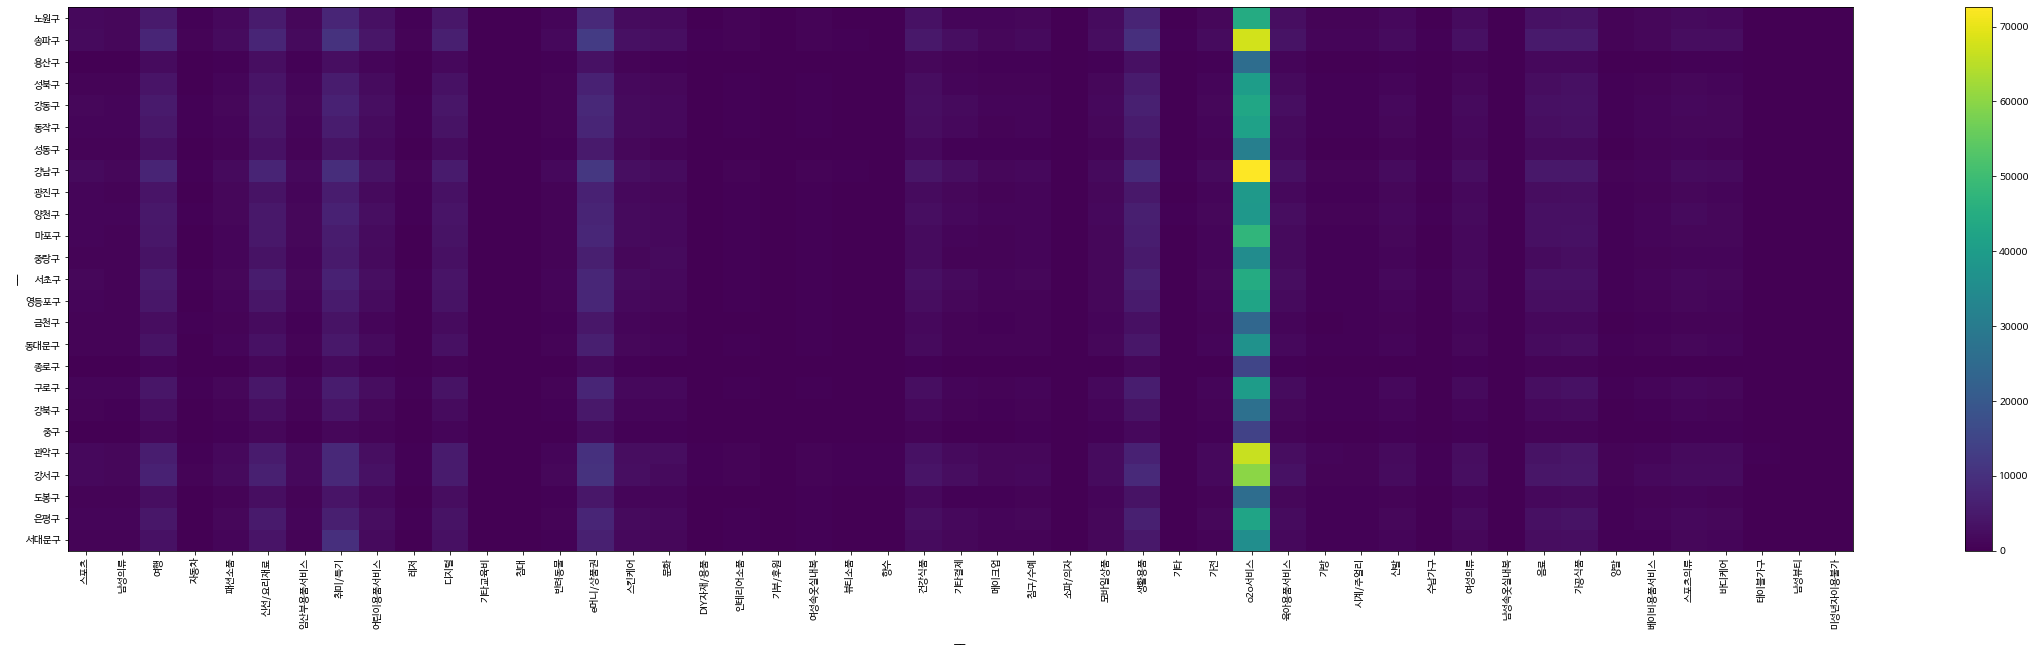

In [15]:
# 시군구 - 매출건수(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_middle = sigoongu_moneycount_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_moneycount_middle)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_middle.columns), 1), sigoongu_moneycount_middle.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_middle.index), 1), sigoongu_moneycount_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [16]:
#  시군구 - 매출건수(품목중분류명) - 순위
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,스포츠,남성의류,여행,자동차,패션소품,신선/요리재료,임산부용품서비스,취미/특기,어린이용품서비스,레저,...,남성속옷실내복,음료,가공식품,양말,베이비용품서비스,스포츠의류,바디케어,테이블가구,남성뷰티,미성년자이용불가
서대문구,19.0,15.0,18.0,22.0,18.0,15.0,17.0,2.0,17.0,21.0,...,21.0,16.0,15.0,17.0,20.0,17.0,16.0,22.0,22.0,21.0
은평구,10.0,9.0,11.0,12.0,10.0,7.0,10.0,10.0,9.0,11.0,...,18.0,9.0,6.0,7.0,11.0,8.0,9.0,15.0,19.0,12.0
도봉구,21.0,19.0,20.0,16.0,19.0,20.0,20.0,19.0,19.0,13.0,...,15.0,21.0,19.0,19.0,18.0,19.0,20.0,16.0,14.0,14.0
강서구,4.0,3.0,3.0,1.0,3.0,3.0,3.0,5.0,3.0,3.0,...,2.0,3.0,3.0,1.0,1.0,3.0,2.0,2.0,3.0,2.0
관악구,3.0,2.0,4.0,4.0,4.0,6.0,4.0,4.0,8.0,5.0,...,1.0,4.0,4.0,3.0,7.0,5.0,4.0,1.0,1.0,1.0
중구,24.0,23.0,24.0,23.0,24.0,25.0,24.0,25.0,24.0,23.0,...,22.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,19.0,21.0
강북구,20.0,22.0,21.0,17.0,20.0,21.0,21.0,20.0,21.0,14.0,...,8.0,20.0,21.0,21.0,21.0,20.0,19.0,13.0,6.0,7.0
구로구,12.0,8.0,13.0,8.0,9.0,10.0,12.0,12.0,10.0,9.0,...,7.0,11.0,9.0,12.0,4.0,10.0,8.0,7.0,4.0,14.0
종로구,25.0,25.0,25.0,25.0,25.0,24.0,25.0,24.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,22.0,21.0
동대문구,16.0,16.0,17.0,14.0,16.0,19.0,18.0,18.0,18.0,17.0,...,11.0,17.0,18.0,14.0,16.0,15.0,18.0,16.0,16.0,16.0


In [17]:
#  각 시군구 내에서 매출건수(품목중분류명) 기준으로 순위
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,스포츠,남성의류,여행,자동차,패션소품,신선/요리재료,임산부용품서비스,취미/특기,어린이용품서비스,레저,...,남성속옷실내복,음료,가공식품,양말,베이비용품서비스,스포츠의류,바디케어,테이블가구,남성뷰티,미성년자이용불가
서대문구,26.0,25.0,6.0,36.0,21.0,5.0,22.0,2.0,11.0,35.0,...,47.0,9.0,8.0,33.0,28.0,18.0,20.0,42.0,48.0,48.0
은평구,25.0,26.0,6.0,36.0,21.0,5.0,24.0,4.0,11.0,35.0,...,46.0,9.0,8.0,33.0,27.0,15.0,20.0,42.0,49.0,48.0
도봉구,25.0,26.0,5.0,34.0,20.0,6.0,22.0,3.0,11.0,36.0,...,42.0,10.0,8.0,33.0,24.0,15.0,18.0,41.0,49.0,47.0
강서구,24.0,27.0,5.0,35.0,21.0,6.0,23.0,4.0,11.0,36.0,...,43.0,9.0,8.0,32.0,26.0,17.0,19.0,41.0,49.0,48.0
관악구,21.0,26.0,5.0,35.0,22.0,6.0,24.0,3.0,11.0,36.0,...,44.0,9.0,8.0,34.0,28.0,17.0,20.0,40.0,48.0,46.0
중구,26.0,25.0,5.0,34.0,20.0,6.0,24.0,4.0,12.0,37.0,...,46.0,9.0,8.0,35.0,23.0,16.0,17.0,41.0,47.0,49.0
강북구,25.0,27.0,5.0,35.0,20.0,6.0,24.0,3.0,11.0,36.0,...,42.0,9.0,8.0,32.0,28.0,16.0,19.0,40.0,44.0,46.0
구로구,26.0,27.0,6.0,34.0,20.0,5.0,22.0,4.0,11.0,36.0,...,43.0,9.0,8.0,33.0,25.0,17.0,19.0,41.0,45.0,49.0
종로구,28.0,25.0,6.0,35.0,19.0,5.0,22.0,3.0,11.0,42.0,...,42.0,9.0,8.0,34.0,31.0,17.0,18.0,42.0,42.0,42.0
동대문구,24.0,26.0,5.0,35.0,19.0,6.0,22.0,3.0,11.0,36.0,...,42.0,9.0,8.0,31.0,25.0,15.0,21.0,41.0,49.0,48.0


In [18]:
# 클러스터링
# 시군구 - 매출건수(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_middle['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_middle[sigoongu_moneycount_middle['cluster_id'] == i]
    print(temp['cluster_id'])

도봉구    0
강북구    0
금천구    0
성동구    0
용산구    0
Name: cluster_id, dtype: int32
은평구     1
영등포구    1
서초구     1
마포구     1
동작구     1
강동구     1
노원구     1
Name: cluster_id, dtype: int32
강서구    2
관악구    2
강남구    2
송파구    2
Name: cluster_id, dtype: int32
서대문구    3
구로구     3
동대문구    3
중랑구     3
양천구     3
광진구     3
성북구     3
Name: cluster_id, dtype: int32
중구     4
종로구    4
Name: cluster_id, dtype: int32


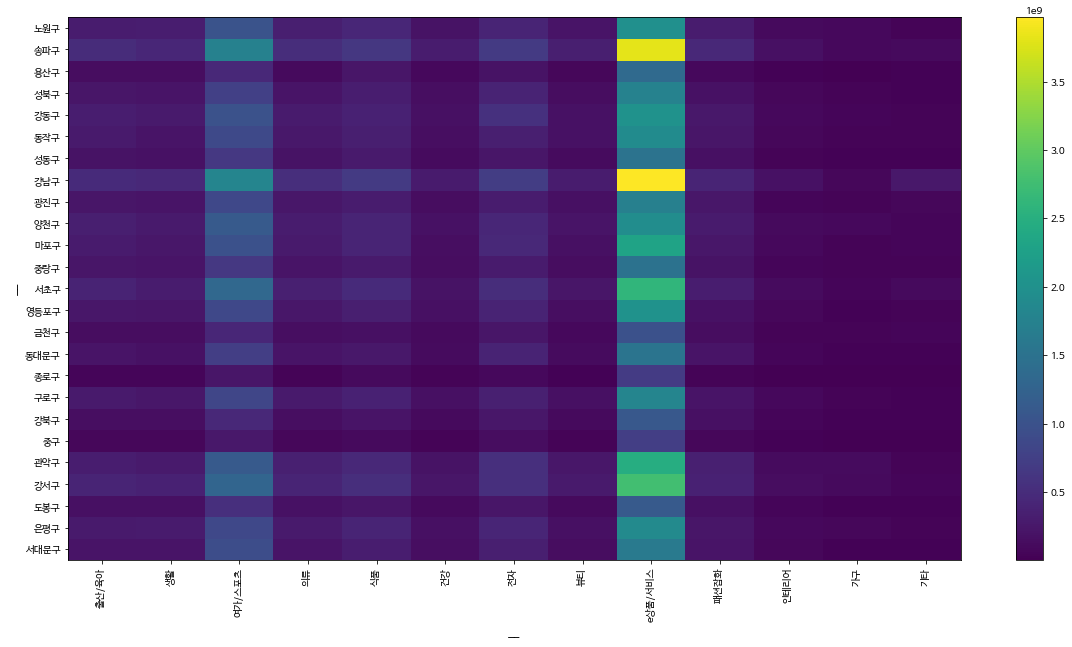

In [19]:
# 시군구 - 매출금액(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [20]:
# 시군구 - 매출금액(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending= False)

,출산/육아,생활,여가/스포츠,의류,식품,건강,전자,뷰티,e상품/서비스,패션잡화,인테리어,가구,기타
서대문구,18.0,17.0,10.0,18.0,14.0,15.0,15.0,17.0,16.0,13.0,13.0,17.0,17.0
은평구,12.0,6.0,14.0,9.0,9.0,8.0,9.0,10.0,12.0,12.0,9.0,7.0,12.0
도봉구,20.0,20.0,20.0,20.0,21.0,20.0,22.0,21.0,21.0,21.0,19.0,19.0,22.0
강서구,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,8.0
관악구,6.0,7.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,1.0,9.0
중구,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,24.0
강북구,21.0,21.0,21.0,21.0,22.0,21.0,19.0,20.0,22.0,19.0,20.0,20.0,19.0
구로구,10.0,11.0,15.0,10.0,11.0,11.0,14.0,12.0,13.0,14.0,11.0,12.0,21.0
종로구,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
동대문구,17.0,18.0,17.0,17.0,19.0,18.0,13.0,18.0,17.0,15.0,18.0,18.0,16.0


In [21]:
# 각 시군구 내에서 매출금액(품목대분류명) 기준 순위
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending= False, axis = 1)

,출산/육아,생활,여가/스포츠,의류,식품,건강,전자,뷰티,e상품/서비스,패션잡화,인테리어,가구,기타
서대문구,6.0,8.0,2.0,5.0,4.0,9.0,3.0,10.0,1.0,7.0,11.0,13.0,12.0
은평구,7.0,5.0,2.0,6.0,4.0,9.0,3.0,10.0,1.0,8.0,11.0,12.0,13.0
도봉구,6.0,8.0,2.0,5.0,4.0,9.0,3.0,10.0,1.0,7.0,11.0,12.0,13.0
강서구,5.0,8.0,2.0,6.0,4.0,10.0,3.0,9.0,1.0,7.0,11.0,12.0,13.0
관악구,7.0,8.0,2.0,6.0,4.0,10.0,3.0,9.0,1.0,5.0,11.0,12.0,13.0
중구,5.0,6.0,2.0,7.0,4.0,10.0,3.0,9.0,1.0,8.0,11.0,13.0,12.0
강북구,6.0,7.0,2.0,8.0,4.0,10.0,3.0,9.0,1.0,5.0,11.0,13.0,12.0
구로구,5.0,7.0,2.0,6.0,3.0,10.0,4.0,9.0,1.0,8.0,11.0,12.0,13.0
종로구,6.0,5.0,2.0,7.0,3.0,9.0,4.0,10.0,1.0,8.0,11.0,13.0,12.0
동대문구,6.0,8.0,2.0,5.0,4.0,10.0,3.0,9.0,1.0,7.0,11.0,13.0,12.0


In [22]:
# 클러스터링
# 시군구 - 매출금액(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_large[sigoongu_money_large['cluster_id'] == i]
    print(temp['cluster_id'])

서대문구    0
구로구     0
동대문구    0
중랑구     0
광진구     0
성동구     0
성북구     0
Name: cluster_id, dtype: int32
강남구    1
송파구    1
Name: cluster_id, dtype: int32
도봉구    2
중구     2
강북구    2
종로구    2
금천구    2
용산구    2
Name: cluster_id, dtype: int32
강서구    3
관악구    3
서초구    3
Name: cluster_id, dtype: int32
은평구     4
영등포구    4
마포구     4
양천구     4
동작구     4
강동구     4
노원구     4
Name: cluster_id, dtype: int32


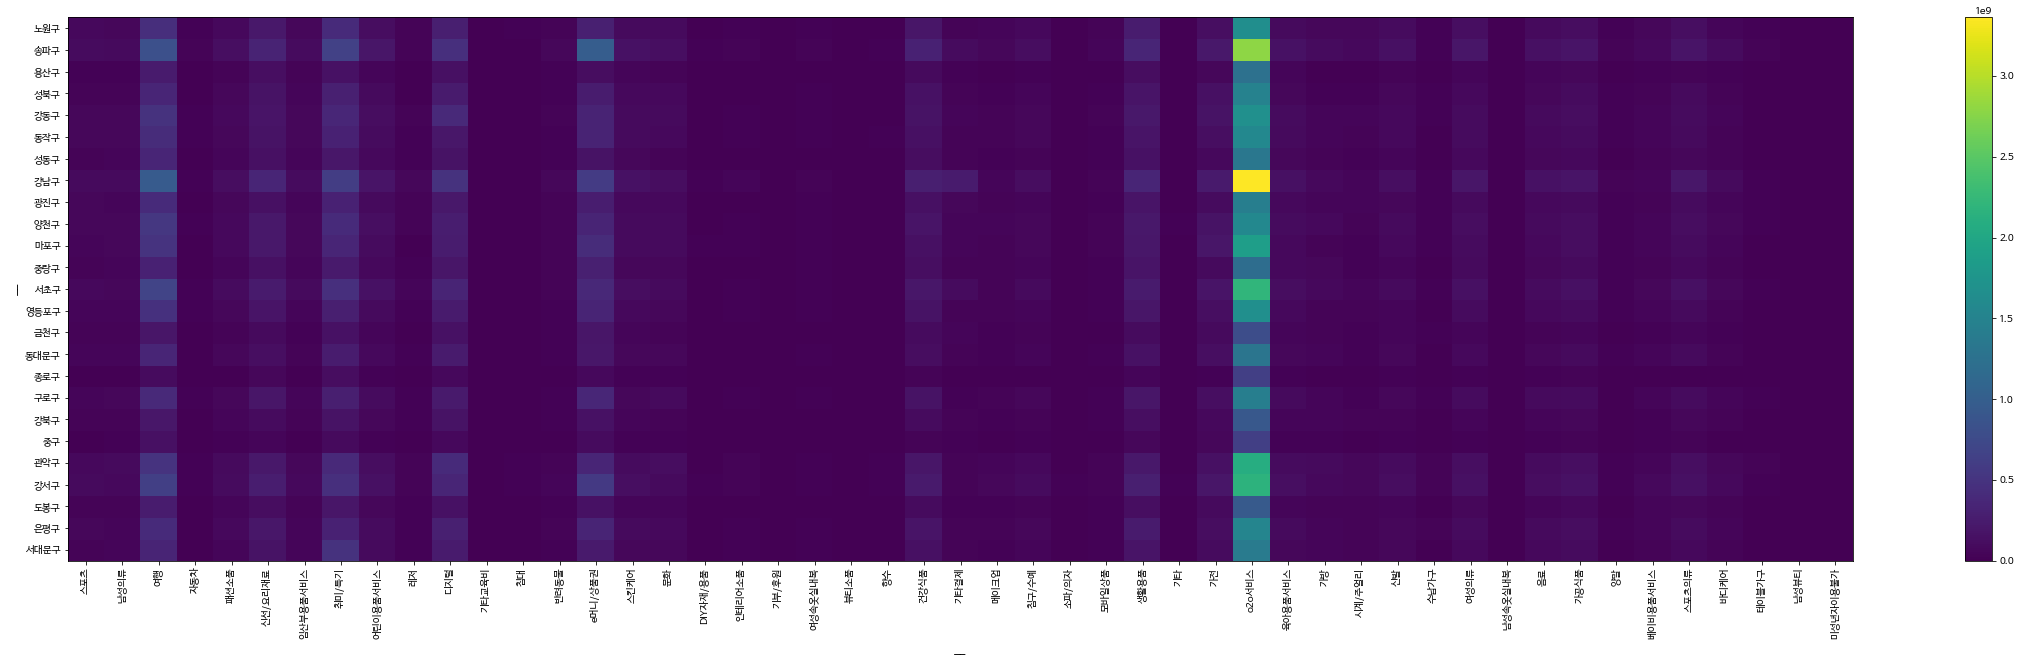

In [23]:
# 시군구 - 매출금액(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_middle = sigoongu_money_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_money_middle)
plt.xticks(np.arange(0.5, len(sigoongu_money_middle.columns), 1), sigoongu_money_middle, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_middle.index), 1), sigoongu_money_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [24]:
#  시군구 - 매출금액(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,스포츠,남성의류,여행,자동차,패션소품,신선/요리재료,임산부용품서비스,취미/특기,어린이용품서비스,레저,...,남성속옷실내복,음료,가공식품,양말,베이비용품서비스,스포츠의류,바디케어,테이블가구,남성뷰티,미성년자이용불가
서대문구,19.0,16.0,18.0,22.0,17.0,14.0,14.0,3.0,16.0,17.0,...,21.0,15.0,15.0,17.0,20.0,17.0,17.0,19.0,22.0,21.0
은평구,10.0,13.0,12.0,15.0,9.0,9.0,13.0,13.0,10.0,11.0,...,17.0,10.0,7.0,15.0,12.0,9.0,10.0,13.0,21.0,15.0
도봉구,22.0,20.0,20.0,20.0,21.0,21.0,21.0,20.0,21.0,14.0,...,14.0,20.0,20.0,20.0,15.0,20.0,21.0,20.0,16.0,14.0
강서구,3.0,4.0,4.0,3.0,4.0,3.0,4.0,5.0,4.0,5.0,...,1.0,3.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,3.0
관악구,4.0,3.0,6.0,7.0,5.0,8.0,5.0,8.0,7.0,3.0,...,2.0,5.0,5.0,5.0,7.0,6.0,4.0,1.0,1.0,1.0
중구,24.0,23.0,24.0,24.0,24.0,25.0,24.0,25.0,24.0,23.0,...,23.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,20.0,21.0
강북구,21.0,22.0,22.0,13.0,20.0,22.0,22.0,21.0,20.0,12.0,...,9.0,22.0,21.0,22.0,21.0,21.0,19.0,16.0,3.0,6.0
구로구,12.0,10.0,14.0,4.0,12.0,10.0,11.0,16.0,11.0,13.0,...,6.0,8.0,13.0,18.0,9.0,11.0,8.0,8.0,5.0,13.0
종로구,25.0,25.0,25.0,25.0,25.0,24.0,25.0,24.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,22.0,21.0
동대문구,15.0,17.0,16.0,16.0,16.0,20.0,19.0,17.0,18.0,19.0,...,8.0,17.0,18.0,13.0,13.0,15.0,20.0,21.0,12.0,17.0


In [25]:
#  각 시군구 내에서 매출금액(품목중분류명) 기준 순위
pack = []
for gu in sigoongu:
    temp = df_1909[df_1909['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,스포츠,남성의류,여행,자동차,패션소품,신선/요리재료,임산부용품서비스,취미/특기,어린이용품서비스,레저,...,남성속옷실내복,음료,가공식품,양말,베이비용품서비스,스포츠의류,바디케어,테이블가구,남성뷰티,미성년자이용불가
서대문구,26.0,23.0,3.0,38.0,19.0,7.0,21.0,2.0,11.0,33.0,...,46.0,14.0,10.0,35.0,28.0,12.0,25.0,39.0,48.0,48.0
은평구,21.0,23.0,2.0,37.0,17.0,7.0,22.0,4.0,13.0,33.0,...,45.0,16.0,9.0,36.0,26.0,12.0,24.0,39.0,49.0,47.0
도봉구,27.0,21.0,2.0,37.0,19.0,7.0,24.0,3.0,13.0,31.0,...,44.0,16.0,10.0,34.0,20.0,12.0,25.0,38.0,47.0,49.0
강서구,21.0,23.0,2.0,37.0,18.0,7.0,24.0,4.0,13.0,32.0,...,46.0,16.0,10.0,36.0,26.0,12.0,25.0,38.0,49.0,47.0
관악구,23.0,20.0,2.0,39.0,21.0,7.0,24.0,4.0,13.0,29.0,...,46.0,16.0,10.0,37.0,27.0,12.0,25.0,34.0,47.0,48.0
중구,27.0,21.0,2.0,35.0,19.0,8.0,26.0,4.0,12.0,37.0,...,46.0,16.0,10.0,38.0,24.0,11.0,25.0,39.0,47.0,49.0
강북구,22.0,25.0,2.0,33.0,17.0,7.0,24.0,4.0,11.0,30.0,...,41.0,15.0,10.0,37.0,28.0,12.0,23.0,38.0,47.0,48.0
구로구,23.0,21.0,2.0,32.0,19.0,7.0,22.0,4.0,13.0,33.0,...,45.0,15.0,10.0,38.0,25.0,12.0,24.0,36.0,46.0,48.0
종로구,26.0,23.0,3.0,38.0,20.0,6.0,21.0,2.0,11.0,42.0,...,42.0,10.0,9.0,32.0,31.0,18.0,22.0,42.0,42.0,42.0
동대문구,23.0,21.0,2.0,36.0,19.0,8.0,25.0,3.0,13.0,33.0,...,42.0,17.0,10.0,32.0,24.0,11.0,27.0,39.0,46.0,49.0


In [26]:
# 클러스터링
# 시군구 - 매출금액(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_middle['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_middle[sigoongu_money_middle['cluster_id'] == i]
    print(temp['cluster_id'])

강서구    0
관악구    0
서초구    0
Name: cluster_id, dtype: int32
서대문구    1
구로구     1
동대문구    1
중랑구     1
광진구     1
성동구     1
성북구     1
용산구     1
Name: cluster_id, dtype: int32
도봉구    2
중구     2
강북구    2
종로구    2
금천구    2
Name: cluster_id, dtype: int32
강남구    3
송파구    3
Name: cluster_id, dtype: int32
은평구     4
영등포구    4
마포구     4
양천구     4
동작구     4
강동구     4
노원구     4
Name: cluster_id, dtype: int32
